# **Step 1: Load the Dataset**

In [1]:
import pandas as pd

# Load the Data
df = pd.read_csv("../Dataset/Cleaned_Averages.csv")



In this step, we loaded the cleaned dataset that we prepared during Phase 1. We will use this data to apply clustering algorithms.


# **Step 2: Remove the Class Label**

In [2]:
X = df.drop(columns=['ترتيب_المدرسة_على_مستوى_المدارس'])

Before applying clustering, we removed the target variable (`ترتيب_المدرسة_على_مستوى_المدارس`) because clustering is an unsupervised learning technique and does not use labeled outputs. This ensures that our clustering is not influenced by the actual rankings.


# **Step 3: Apply KMeans Clustering**

We selected KMeans for clustering because it is one of the most efficient and commonly used unsupervised learning algorithms. It works well when the data is numeric or can be encoded, and it is particularly effective when we aim to group data based on similarity. In our case, the dataset includes numerical and encoded categorical features, making it suitable for KMeans. Additionally, it allows us to clearly define the number of clusters and interpret results easily using evaluation metrics such as WCSS and Silhouette Score.

In [4]:
from sklearn.cluster import KMeans

# Apply KMeans with initial 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Display first few rows with clusters
df.head()


,اسم_المدرسة,المنطقة_الإدارية,الإدارة_التعليمية,المكتب_التعليمي,السلطة,نوع_التعليم,الجنس,تخصص_الاختبار,متوسط_أداء_الطلبة_في_المدرسة,ترتيب_المدرسة_على_مستوى_المدارس,Cluster
0,28,11,45,294,3,6,0,0,1.000000,1,0
1,2496,3,38,71,0,6,0,1,0.872710,1,2
2,3050,11,34,218,3,6,0,0,0.991601,2,2
3,1276,3,38,71,3,0,0,1,0.850850,2,0
4,3938,4,31,245,0,6,0,0,0.982336,3,1


# **Step 4: Evaluate Clustering (Silhouette + WCSS)**

In [5]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil_score}")

# WCSS (Within Cluster Sum of Squares) = Inertia
print(f"WCSS (Inertia): {kmeans.inertia_}")


Silhouette Score: 0.5795069240118754
WCSS (Inertia): 1305411574.7855124


# **Step 5: Try Different Cluster Numbers (Elbow Method)**

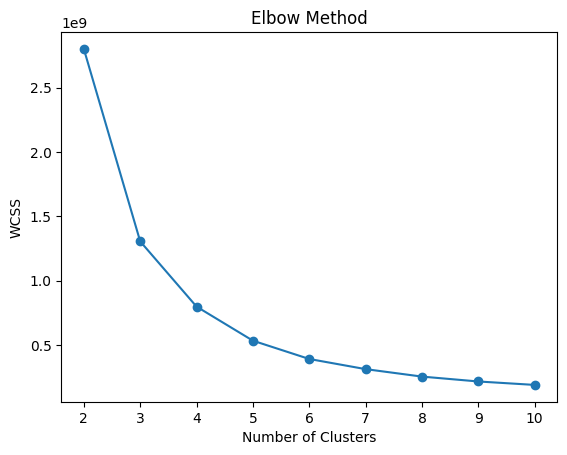

In [6]:
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


# **Step 6: Cluster Visualization (PCA)**

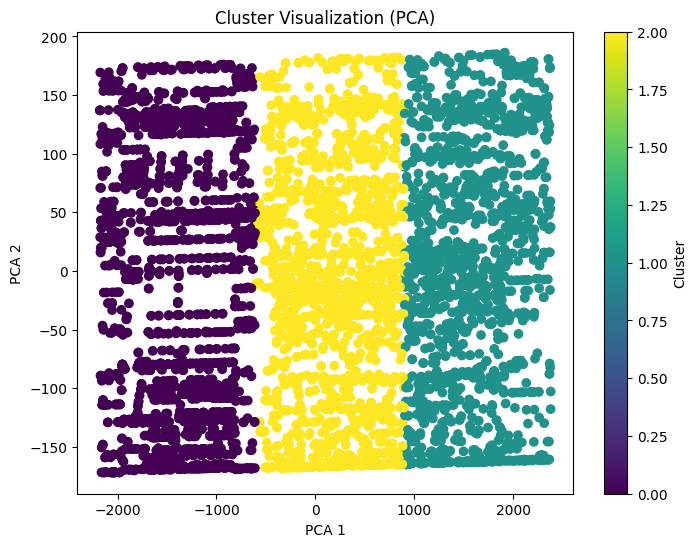

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Cluster Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

We used Principal Component Analysis (PCA) to reduce our dataset to two dimensions and visualize the KMeans clusters [1].

Each point represents a school, colored by its assigned cluster. The plot clearly shows three well-separated groups:

Cluster 0, Cluster 1, and Cluster 2.

This visual confirms that the clustering is meaningful, not random. It supports our earlier metrics (Silhouette Score, WCSS) and shows how schools are grouped based on similar features.

# **Step 7: Cluster Summary**

In [7]:
# View average values for each cluster
df.groupby('Cluster').mean()

,اسم_المدرسة,المنطقة_الإدارية,الإدارة_التعليمية,المكتب_التعليمي,السلطة,نوع_التعليم,الجنس,تخصص_الاختبار,متوسط_أداء_الطلبة_في_المدرسة,ترتيب_المدرسة_على_مستوى_المدارس
Cluster,,,,,,,,,,
0,803.960411,6.773887,32.817282,176.602969,2.916635,5.967644,0.163304,0.422916,0.486737,925.115721
1,3815.796482,6.779397,31.054271,167.004523,2.420603,6.232161,0.559799,0.275377,0.416050,1040.123618
2,2347.876975,6.114409,31.563427,152.239828,2.441360,6.404978,0.592149,0.292484,0.420242,993.887506


To better understand the results of the clustering, we analyzed the average values for each feature within each cluster.

Cluster 0 contains schools with the highest student performance and best rankings. Based on the gender and education type columns, it may mostly include boys’ public schools in specific regions.

Cluster 1 represents schools with lower performance and the worst rankings. These schools may be more diverse in gender and type, potentially including more girls’ schools or schools in less supported areas.

Cluster 2 shows average performance, and could include mixed types of schools with varying characteristics.

This analysis helps us understand the patterns discovered by the algorithm and proves that the clustering is meaningful, not random.

# **Step 8: How Clustering Improves Recommendations**

After applying clustering, each school is grouped based on similar characteristics.
When a user provides preferences (like gender, region, education type), we can detect
which cluster they belong to and recommend schools from the same group.
This makes the recommendation more relevant and personalized.

# **References**

[1] Comment et al. (2025) Principal component analysis(pca), GeeksforGeeks. Available at: https://www.geeksforgeeks.org/principal-component-analysis-pca/ (Accessed: 22 March 2025). 